<a href="https://colab.research.google.com/github/timdeklijn/hu_lecture_20200114/blob/master/notebooks/HU_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit recognition on MNIST data set




## Usecase: create a model that can recognise handwritten digits.

## imports

In [0]:
# Deep learning library
import tensorflow as tf
# plotting library
import matplotlib.pyplot as plt
# Numerical calculations library
import numpy as np

## Constants

In [0]:
epochs = 5                  # how many rounds of training
img_rows, img_cols = 28, 28 # size of the input images

## Functions

In [0]:
def load_data():
    """
    - Load the keras mnist data set
    - Split the data set into train and test sets
    - scale the images to be between 0 and 1

    :returns: train and test sets of the mnist dataset
    """

    mnist = tf.keras.datasets.mnist

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    return x_train, y_train, x_test, y_test

In [0]:
def plot_sample(n, x_train, y_train):
    """
    - Pick the n't image of the train set
    - Print the label of this image
    - plot the handwritten digit

    :param n: int, we take the n'th number of the train set
    :param x_train: training set containing the images
    :param y_train: labels of the training set.
    """
    print(f"Label: {y_train[n]}")
    plt.imshow(x_train[n].reshape(img_rows,img_cols));

In [0]:
def create_model(input_shape):
    """
    Based on the input shape, create a dense neural network
    with a single hidden layer, 20% percent dropout and 10 outputs.

    :param input_shape: tuple(w,h), images dimensions
    :returns: keras sequential neural network
    """
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

## Load data

In [8]:
x_train, y_train, x_test, y_test = load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Investigate data

In [10]:
print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")

Number of training samples: 60000
Number of test samples: 10000


### Show a single sample

Label: 3


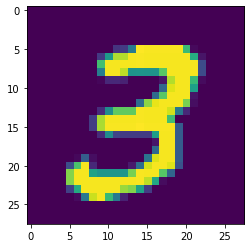

In [8]:
sample_number = 7
plot_sample(sample_number, x_train, y_train)

## Create model

create and compile a model. The weights of this model will be initialized randomly and trained based on the labeled data.

In [9]:
model = create_model((img_rows, img_cols))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Train Model

In [10]:
model.fit(x_train, y_train, epochs=epochs)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2968 - acc: 0.9140
Epoch 2/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1432 - acc: 0.9574
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1087 - acc: 0.9664
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0907 - acc: 0.9724
Epoch 5/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0772 - acc: 0.9763


## Evaluate Model

Check model on test data. This data was not used for training the model

In [11]:
score = model.evaluate(x_test,  y_test, verbose=0)
print(f"Model loss    : {score[0]}")
print(f"Model accuracy: {score[1]}")

Model loss    : 0.07623652506433427
Model accuracy: 0.9763000011444092


## Use the model

Assuming we have a new digit, we can use the model to tell us what number the digit is.

take a digit from the test data

In [0]:
sample = 50

Plot the digit and show the label

Label: 6


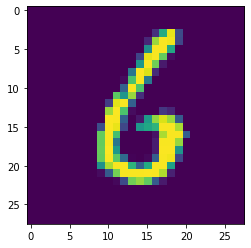

In [16]:
plot_sample(sample, x_test, y_test)

Use the model to predict the label of this digit

In [17]:
result = model.predict_classes(x_test[sample].reshape(1,28,28))[0]
print(f"Digit is: {result}")

Digit is: 6
